TRADING CARD GAME (ASSINGMENT 1)

In [2]:
from pathlib import Path
from multiversx_sdk import (Address, Transaction, TransactionComputer,
                            RelayedTransactionsFactory, TransactionsFactoryConfig,
                            UserSigner, AccountNonceHolder, QueryRunnerAdapter, 
                            SmartContractQueriesController, ProxyNetworkProvider, 
                            SmartContractTransactionsOutcomeParser, TransactionsConverter,
                            TransactionPayload)
from multiversx_sdk import ProxyNetworkProvider
from multiversx_sdk.abi import Abi
import json
import struct
import os
from dotenv import load_dotenv

In [3]:
sender_bech32 = Address.from_bech32("erd122huqjpnv8zw0d83pqh6hsyh4lyh4ghx8m0l729ntmvtqxchfpeqcjqyad")
contract_bech32 = Address.from_bech32("erd1qqqqqqqqqqqqqpgqrqz7r8yl5dav2z0fgnn302l2w7xynygruvaq76m26j")
metachain_address =Address.from_bech32("erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqzllls8a5w6u")
network_provider = ProxyNetworkProvider("https://devnet-gateway.multiversx.com")

load_dotenv()
abi_path = os.getenv("ABI_PATH")
pem_path = os.getenv("PEM_PATH")
abi = Abi.load(Path(abi_path))
signer = UserSigner.from_pem_file(Path(pem_path))
VALUE = "0"
NFT_NAME = "mihai.vasile2508"
COLLECTION_NAME = "COLLECTION"
COLLECTION_TICKER = "RMD"
URI = "https://www.gettyimages.com/detail/news-photo/real-madrid-players-pose-before-the-uefa-champions-league-news-photo/692652618?adppopup=true"

INTERNET CONFIG


In [4]:
config_network = network_provider.get_network_config()
tc = TransactionComputer()

In [5]:
query_run = QueryRunnerAdapter(network_provider)
query_control = SmartContractQueriesController(query_run)
parser = SmartContractTransactionsOutcomeParser()
convert = TransactionsConverter()

ACCOUNT DETAILS AND NONCE 

In [6]:
account_details = network_provider.get_account(sender_bech32)
nonce = AccountNonceHolder(account_details.nonce)

OBTAIN YOUR ASSIGNED NFT


In [12]:
actual_transaction = Transaction (
    receiver = contract_bech32.bech32(), #convert to bech32 string
    sender = sender_bech32.bech32(), # convert to bech 32 string
    value = VALUE,
    gas_limit = 10000000,chain_id=config_network.chain_id,
    data="getYourNftCardProperties".encode('utf-8') # convert to byte string
 )
# getting the nonce and signing the transactiono
actual_transaction.nonce = nonce.get_nonce_then_increment()
actual_transaction.signature = signer.sign(tc.compute_bytes_for_signing(actual_transaction))
#Sending the transaction and PRINT HASH
HASH_VAL = network_provider.send_transaction(actual_transaction)
print("TRANSACTION HASH : ", HASH_VAL )

TRANSACTION HASH :  8b14330e1530524be2f29ae4b640b45be8941de40c28408a122d1a2f5fb140d9


Verifying the Nonce

In [8]:
#VERIFY THE NONCE

def get_account_nonce(address):
    url = f"https://devnet-api.multiversx.com/accounts/{address}"
    try:
        response = request.get(url)
        if response.status_code == 200:
            account_data = response.json()
            return account_data.get('nonce', None)
        else:
            print(f"Failed to fetch data. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

sender_address = "erd122huqjpnv8zw0d83pqh6hsyh4lyh4ghx8m0l729ntmvtqxchfpeqcjqyad"
current_nonce = get_account_nonce(sender_address)
print("Current Nonce of the Sender Account:", current_nonce)



An error occurred: name 'request' is not defined
Current Nonce of the Sender Account: None


CARD ATTRIBUTES

In [10]:
transaction_on_network = network_provider.get_transaction(HASH_VAL)
response_data = transaction_on_network.contract_results.items[0].data

raw_attributes = response_data.split('@')[2]
card_attributes = [int(raw_attributes[i]) for i in range(1, len(raw_attributes), 2)]

print(card_attributes)

IndexError: list index out of range

In [11]:
class CardProperties:
    class_mapping = {
        0: "Warrior",
        1: "Mage",
        2: "Rogue",
        3: "Priest",
        4: "Hunter",
        5: "Warlock",
        6: "Shaman",
        7: "Druid",
        8: "Paladin",
    }
    rarity_mapping = {
        0: "Common",
        1: "Rare",
        2: "Epic",
        3: "Legendary",
    }
    power_mapping = {
        0: "Low",
        1: "Medium",
        2: "High",
    }

    @staticmethod
    def interpret(attributes):
        card_class = CardProperties.class_mapping.get(attributes[0], "Invalid Class")
        card_rarity = CardProperties.rarity_mapping.get(attributes[1], "Invalid Rarity")
        card_power = CardProperties.power_mapping.get(attributes[2], "Invalid Power")

        return f"{{{card_class}, {card_rarity}, {card_power}}}"
    
CARD_attributes =  card_attributes
result = CardProperties.interpret(CARD_attributes)
print(result)


NameError: name 'card_attributes' is not defined

QUERY SMART CONTRACT

In [81]:
query = query_control.create_query(
    contract=contract_bech32.to_bech32(),
    function="nftSupply",
    arguments=[],
)
response = query_control.run_query(query)
data_parts = query_control.parse_query_response(response)
BYTE_SEQUENCE_DELIMITER = b"\x00\x00\x00\x03"

cards = []
for data in data_parts:
    decoded_string = data.decode("utf-8", errors="ignore") 

    if BYTE_SEQUENCE_DELIMITER in data:
       split_data = data.partition(BYTE_SEQUENCE_DELIMITER)[2] 
       cards.append([split_data[0], split_data[1], split_data[2]])

card_nonce = -1

for index in range(len(cards)):
    if cards[index] == card_attributes:
        card_nonce = index +1
        break

print(card_nonce)

63


NFT 


CREATE NFT COLLECTION


In [82]:
ACCOUNT_DETAILS = network_provider.get_account(sender_bech32)
NONCE_index = AccountNonceHolder(ACCOUNT_DETAILS.nonce)

data = (
    f"issueNonFungible@{COLLECTION_NAME.encode('utf-8').hex()}"
    f"@{COLLECTION_TICKER.encode('utf-8').hex()}"
)

transaction = Transaction (
    sender=sender_bech32.bech32(),
    receiver=metachain_address.bech32(),
    value=50000000000000000,
    gas_limit=500000000,
    data=data.encode("UTF-8"),
    chain_id=config_network.chain_id,
)
transaction.nonce = NONCE_index.get_nonce_then_increment()
transaction.signature = signer.sign(tc.compute_bytes_for_signing(transaction))
hash_col = network_provider.send_transaction(transaction)

print("Transaction hash :" + hash_col)


Transaction hash :3e03a4c5242e122b3da23f32ba11aa5816fec8f190192480bc1ccccc0729ff80


GET COLLECTION

In [89]:
transaction_on_network = network_provider.get_transaction(hash_col)
response_data = transaction_on_network.contract_results.items

collection = None

for i in response_data:
    if "ESDTSetTokenType" in i.data:
        col_hex = i.data.split("@")[1]
        collection = bytes.fromhex(col_hex).decode("UTF-8")
        break  

print(collection)

RMD-454671


ADD ROLES TO COLECTION

In [90]:
ESDTRoleNFTCreate = "45534454526f6c654e4654437265617465" 

data = (
    f"setSpecialRole@{col_hex}"
    f"@{sender_bech32.hex()}"
    f"@{ESDTRoleNFTCreate}"
)

transaction = Transaction(
    sender=sender_bech32.bech32(),
    receiver=metachain_address.bech32(),
    value=0,
    gas_limit=60000000,
    data=data.encode("utf-8"),
    chain_id=config_network.chain_id,
)

transaction.nonce = NONCE_index.get_nonce_then_increment()
transaction.signature = signer.sign(tc.compute_bytes_for_signing(transaction))
hash_role = network_provider.send_transaction(transaction)

print(f"Hash Role:  {hash_role}")

Hash Role:  27ac4d54c29ca4fe9620db3c1ecd3a7411e8950ab135b15d756e166d966ce57a


NFT CREATION

In [ ]:
Class = card_attributes[0]
Rarity = card_attributes[1]
Power = card_attributes[2]

quantity = 1
royalties = "07d0"
hash = ""
Attributes = "{:02x}{:02x}{:02x}".format(Class, Rarity, Power)

account_details = network_provider.get_account(sender_bech32)
NONCE_index = AccountNonceHolder(account_details.nonce)

data = (
    f"ESDTNFTCreate@{col_hex}"
    f"@{quantity:02x}"
    f"@{NFT_NAME.encode('utf-8').hex()}"
    f"@{royalties}"
    f"@{hash}"
    f"@{Attributes}"
    f"@{URI.encode('utf-8').hex()}"
)

transaction = Transaction(
    sender=sender_bech32.bech32(),
    receiver=sender_bech32.bech32(),
    value=0,
    gas_limit=10000000,
    data=data.encode("UTF-8"),
    chain_id=config_network.chain_id
)

transaction.nonce = NONCE_index.get_nonce_then_increment()
transaction.signature = signer.sign(tc.compute_bytes_for_signing(transaction))
created_NFT = network_provider.send_transaction(transaction)

print(created_NFT)

cf2b003140bd0fa552fa6d604da023dd9cd1f820b13061b120f4df154d11088f


GET NFT 

In [104]:
transaction_on_network = network_provider.get_transaction(created_NFT)
data = transaction_on_network.contract_results.items[0].data
NFT_nonce = data.split("@")[2]
print(NFT_nonce)


01


TRADING NFT


In [ ]:
metadata = "exchangeNft".encode("utf-8").hex()
acc_details = network_provider.get_account(sender_bech32)
nonce_holder = AccountNonceHolder(acc_details.nonce)

data = (
    f"ESDTNFTTransfer@{col_hex}"
    f"@{NFT_nonce}"
    f"@{1:02x}"
    f"@{contract_bech32.hex()}"
    f"@{metadata}"
    f"@{card_nonce:02x}"
)

transaction = Transaction(

    sender=sender_bech32.bech32(),
    receiver=sender_bech32.bech32(),
    value=0,
    gas_limit=100000000,
    chain_id=config_network.chain_id,
    data=data.encode("UTF-8")
)

transaction.nonce = nonce_holder.get_nonce_then_increment()
transaction.signature = signer.sign(tc.compute_bytes_for_signing(transaction))
NFT_TRANSFER_HASH = network_provider.send_transaction(transaction)

print(NFT_TRANSFER_HASH)


NFT_TRANSFER_HASH : 6d5d2547b5e5639abc9a20aa391b5ae1fdcb6410e24f7f833f667d5484840671

Verification for assignment

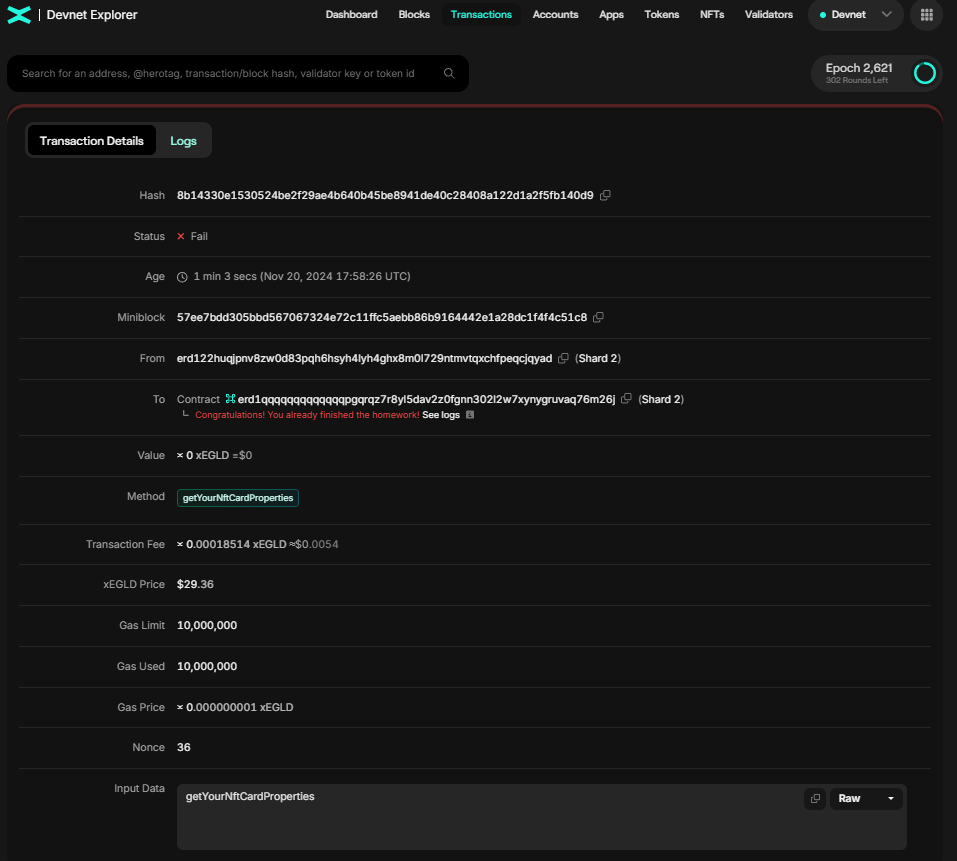